In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [9]:
import simulations as sim
import reconstruct_video as rv
reload(sim)
reload(rv)

<module 'reconstruct_video' from 'reconstruct_video.py'>

In [69]:
# generate the data
num_frame = 100
video = sim.make_rotating_square(num_frame, 0.1, 360, sigma=0)

# format the data
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)

# Shuffle rows of X
# np.random.shuffle(X)

In [70]:
# apply isomap
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)

# Reconstruct order of frames
frame_order = rv.greedy_reconstruct_frame_order(X_iso)

[0, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


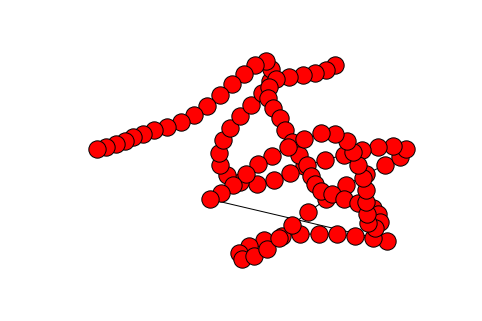

In [71]:
reload(rv)
import networkx as nx
G = rv.graph_reconstruct_frame_order(X_iso)
min_tree = nx.minimum_spanning_tree(G)
h_tree = rv.hamilton(G)

print h_tree

nx.draw(min_tree)
plt.show()

In [5]:
frame_order

array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,  2,  5,  6,  7,
        9,  8, 10, 11, 13, 12, 14, 17, 16, 15, 18, 19, 82, 83, 81, 80, 79,
       78, 77, 75, 76, 74, 73, 72, 71, 69, 70, 20, 48, 49, 47, 51, 92, 50,
       45, 90, 46, 93, 89, 52, 94, 91, 44, 43, 42, 95, 87, 88, 54, 53, 96,
       86, 84, 97, 99, 85, 98, 68, 21, 22, 24, 25, 23, 26, 27, 28, 30, 29,
       32, 31, 33, 34, 35, 36, 37, 38, 40, 41, 39], dtype=int64)

In [66]:
# take only every 10th sample
X_iso = X_iso[1::5]
labels = range(0,num_frame)
labels = labels[1::5]

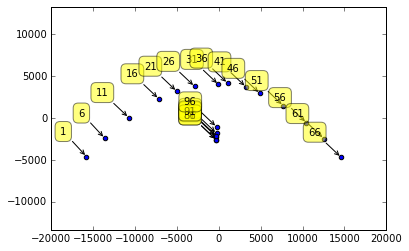

In [67]:
plt.scatter(X_iso[:,0], X_iso[:,1])
plt.axis('equal')
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
